In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer,SimpleImputer

In [3]:
df=pd.read_csv('train.csv')[['Age','Pclass','Fare','Survived']]

In [4]:
df.sample(2)

,Age,Pclass,Fare,Survived
716,38.0,1,227.525,1
353,25.0,3,17.800,0


In [5]:
df.isnull().mean()*100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [6]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [8]:
knn=KNNImputer(n_neighbors=3,weights='distance')

x_train_trf=knn.fit_transform(X_train)
x_test_trf=knn.transform(X_test)

In [9]:
pd.DataFrame(x_train_trf,columns=X_train.columns)

,Age,Pclass,Fare
0,4.0,1.0,81.8583
1,32.0,3.0,7.8958
2,1.0,3.0,11.1333
3,36.0,2.0,27.7500
4,43.0,2.0,26.2500
...,...,...,...
618,21.0,3.0,7.6500
619,38.0,1.0,31.0000
620,41.0,3.0,14.1083
621,14.0,1.0,120.0000


In [10]:
lmr=LogisticRegression()
lmr.fit(x_train_trf,y_train)

y_pred=lmr.predict(x_test_trf)
accuracy_score(y_test,y_pred)

0.7201492537313433

# before using distance it's 71.5852656
# after using distance it's 72.014925
incress in accuracy as we use distance

In [11]:
# mean imputation then 
imputer=SimpleImputer()
x_train_tr2=imputer.fit_transform(X_train)
x_test_tr2=imputer.fit_transform(X_test)

In [12]:
lr=LogisticRegression()
lr.fit(x_train_tr2,y_train)
y_pred2=lr.predict(x_test_tr2)

accuracy_score(y_test,y_pred2)

0.7238805970149254

C:\Users\raj\AppData\Local\Temp\ipykernel_13716\4122810391.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train)
C:\Users\raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

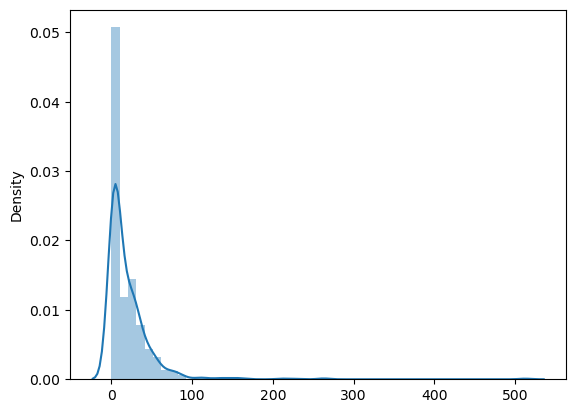

In [15]:
import seaborn as sns
sns.distplot(X_train)

In [ ]:
sns.distplot(X_train_)